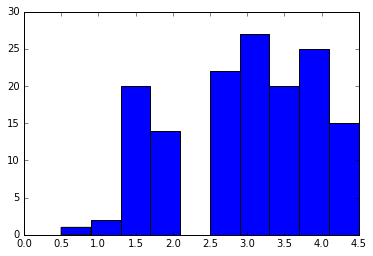

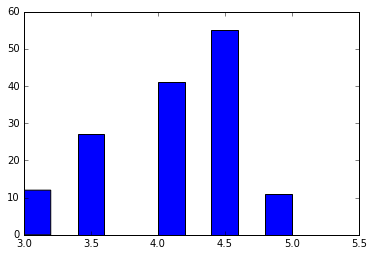

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

movies = pd.read_csv("fandango_score_comparison.csv")

plt.hist(movies["Metacritic_norm_round"],10)
plt.show()

plt.hist(movies["Fandango_Stars"], 10)
plt.show()




fandango stars have no ratings below a 3
min for meta is 0.5

In [9]:
print(movies["Fandango_Stars"].mean())
print(movies["Metacritic_norm_round"].mean())

print(movies["Fandango_Stars"].median())
print(movies["Metacritic_norm_round"].median())

import numpy as np

print(movies["Fandango_Stars"].std())
print(movies["Metacritic_norm_round"].std())


4.08904109589
2.97260273973
4.0
3.0
0.540385977979
0.990960561374


Review methodologies 

meta - critics only, weighted average depending on source
fan - user, rounds up

why is median lower/higher than mean?

median being lower suggests small number of high values bringing mean up
median being higher - fandango is top heavy, only 3-5 range

std dev -
fan - again much narrower range of values, 3-5 only
meta - higher dev from wider range of scores, 0-5

mean - 3 is minimum

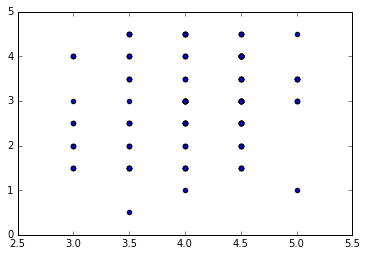

In [10]:
plt.scatter(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
plt.show()

In [15]:
movies["fm_diff"] = np.abs(movies["Metacritic_norm_round"] - movies["Fandango_Stars"])

movies.sort_values(by = "fm_diff", ascending = False)
movies.head()

FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm   ...     RT_norm_round  RT_user_norm_round  \
0     3.70           4.3   ...               3.5                 4.5   
1     4.25           4.0   ...               4.5                 4.0   
2     4.00           4.5   ...               4.0                 4.5   
3     0.90           4.2   ...               1.0                 4.0   
4     0.70           1.4   ...               0.5                 1.5   

   Metacritic_norm_round  Metacritic_user_norm_round  IMDB_norm_round  \
0                    3.5                         3.5              4.0   
1                    3.5                         4.0              3.5   
2                    3.0                         4.0              4.0   
3                    1.0                         2.5              2.5   
4                    1.5                         1.5              2.5   

   Metacritic_user_vote_count  IMDB_user_vote_count  Fandango_votes  \
0                        1330                271107           14846   
1                         249                 65709           12640   
2                         627                103660           12055   
3                          31                  3136            1793   
4                          88                 19560            1021   

   Fandango_Difference  fm_diff  
0                  0.5      1.5  
1                  0.5      1.5  
2                  0.5      2.0  
3                  0.5      4.0  
4                  0.5      2.0  

[5 rows x 23 columns]

In [6]:
from scipy.stats import pearsonr

r_value, p_value = pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
print(r_value)
from scipy.stats import linregress

slope, intercept, r_value, p_value, stderr_slope = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

pred_3 = 3 * slope + intercept
print(pred_3)

0.178449190739
4.09170715282


low correlation might mean that the different review methodologies produce different results, so a movie rated highly on one site might review badly on another. this is again damaging for fandango as they are not just inflating good movie scores but are rating bad movies as good

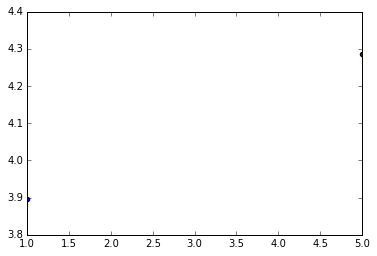

In [7]:
pred_1 = 1 * slope + intercept
pred_5 = 5 * slope + intercept

plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot([1.0,5.0], pred_1,pred_5)
plt.xlim(1,5)
plt.show()